# Lab2 Undirected graph Creation and Finding degree

In [2]:
import networkx as nxx
import matplotlib.pyplot as plt1

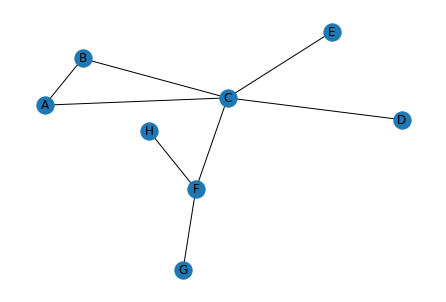

In [3]:
G1 = nxx.Graph()  
# G1.add_nodes_from(["A","B","C","D","E","F"])
G1.add_edge("A", "B") 
G1.add_edge("A", "C")  
G1.add_edge("B", "C")
G1.add_edge("C", "E")
G1.add_edge("C", "D") 
G1.add_edge("C", "F")
G1.add_edge("F", "H")
G1.add_edge("F", "G")   
# nxx.draw(G1, with_labels= True)  
 
nxx.draw(G1, with_labels=True)  

In [4]:
G1.degree

DegreeView({'A': 2, 'B': 2, 'C': 5, 'E': 1, 'D': 1, 'F': 3, 'H': 1, 'G': 1})

# Lab2 Creating Weighted undirected Network and then finding its Degree and Strength 

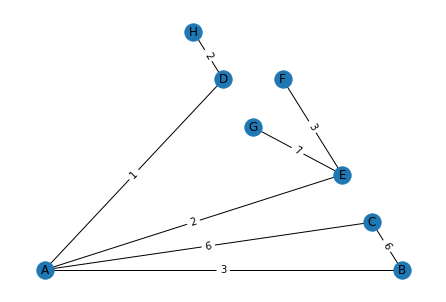

In [5]:
G2= nxx.Graph()  
G2.add_nodes_from(["A","B","C","D","E","F"])
G2.add_edge("C", "B", weight=6) 
G2.add_edge("C", "A", weight=6)  
G2.add_edge("B", "A", weight=3)
G2.add_edge("A", "D", weight=1)
G2.add_edge("A", "E", weight=2) 
G2.add_edge("E", "G", weight=7)
G2.add_edge("E", "F", weight=3)
G2.add_edge("D", "H", weight=2)   
# nxx.draw(G1, with_labels= True)  
# pos=nxx.circular_layout(G1)
pos=nxx.planar_layout(G2)
# pos=nxx.random_layout(G1)




nxx.draw(G2 ,pos, with_labels=True)  
edge_weight_ = nxx.get_edge_attributes(G2,'weight')  
nxx.draw_networkx_edge_labels(G2, pos, edge_labels = edge_weight_)  
plt1.show()  

In [6]:
G2.degree

DegreeView({'A': 4, 'B': 2, 'C': 2, 'D': 2, 'E': 3, 'F': 1, 'G': 1, 'H': 1})

In [7]:
out=0
for node in G2.nodes():
    for edges in G2.edges(node):
        out+=G2.get_edge_data(*edges)["weight"]
    print("Strength of Node "+node+" is:: "+str(out))
    out=0
# print(G1.nodes())

Strength of Node A is:: 12
Strength of Node B is:: 9
Strength of Node C is:: 12
Strength of Node D is:: 3
Strength of Node E is:: 12
Strength of Node F is:: 3
Strength of Node G is:: 7
Strength of Node H is:: 2


# Lab 3 finding betweenness and closeness

In [8]:
# degree_centrality
deg_centrality = nxx.degree_centrality(G2)
deg_centrality

{'A': 0.5714285714285714,
 'B': 0.2857142857142857,
 'C': 0.2857142857142857,
 'D': 0.2857142857142857,
 'E': 0.42857142857142855,
 'F': 0.14285714285714285,
 'G': 0.14285714285714285,
 'H': 0.14285714285714285}

In [9]:
edge_weight_ = nxx.get_edge_attributes(G2,'weight')  
bet_centrality = nxx.betweenness_centrality(G2,weight="weight", normalized=False)
bet_centrality
# edge_weight_

{'A': 16.0,
 'B': 0.0,
 'C': 0.0,
 'D': 6.0,
 'E': 11.0,
 'F': 0.0,
 'G': 0.0,
 'H': 0.0}

In [10]:
edge_weight_ = nxx.get_edge_attributes(G2,'weight')  
bet_centrality = nxx.closeness_centrality(G2, distance="weight")
print(bet_centrality)
max(bet_centrality.values())

{'A': 0.2413793103448276, 'B': 0.1590909090909091, 'C': 0.11290322580645161, 'D': 0.21212121212121213, 'E': 0.21212121212121213, 'F': 0.13725490196078433, 'G': 0.09333333333333334, 'H': 0.15555555555555556}


0.2413793103448276

In [11]:
# Prove of it that it is calculted correctly
x=nxx.single_source_dijkstra_path_length(G2,source="A", weight="weight")
val=sum(x.values())
val=val/(len(x.values())-1)
print(1/val)
# k=0
# for i in x.values():
#     if i==0:
#         pass
#     else:        
#         i=1/i
#         k=k+i
# print((1/k)/7) 
# # 1/i
# # sum(x.values())/len(x.values())

0.24137931034482757


#  Lab 4 finding global clustering of network

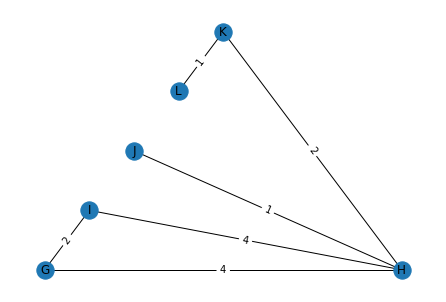

In [12]:
G3= nxx.Graph()  
G3.add_nodes_from(["G","H","I","J","K","L"])
G3.add_edge("G", "H", weight=4) 
G3.add_edge("G", "I", weight=2)  
G3.add_edge("H", "I", weight=4)
G3.add_edge("H", "J", weight=1)
G3.add_edge("H", "K", weight=2) 
G3.add_edge("K", "L", weight=1)


# pos=nxx.circular_layout(G3)
pos=nxx.planar_layout(G3)
# pos=nxx.random_layout(G3)

nxx.draw(G3 ,pos, with_labels=True)  
edge_weight_ = nxx.get_edge_attributes(G3,'weight')  
nxx.draw_networkx_edge_labels(G3, pos, edge_labels = edge_weight_)  
plt1.show()  

In [13]:
from itertools import combinations
dna=["G","H","I","J","K","L"]
com=list(combinations(dna,3))
# com

In [14]:
com_alter=[]
for i in com:
    com_alter.append((i[0],i[1],i[2]))    
    com_alter.append((i[1],i[2],i[0]))
    com_alter.append((i[2],i[0],i[1]))
#     print(i)
# com_alter

In [15]:
new_edge={}
for k in edge_weight_:
    new_edge[k]=edge_weight_[k]
    new_edge[(k[1],k[0])]=edge_weight_[k]
#     break
#     print(edge_weight_[k])
#     print(v)

# new_edge

In [16]:
AM={}
GM={}
MIN={}
MAX={}
import math
for i in com_alter:
    first_edge=i[0:2]
    second_edge=i[1:3]
#     print(first_edge)
    if first_edge in new_edge.keys() and second_edge in new_edge.keys():
#         print(i)
#         print("Wij= ",new_edge[first_edge],"Wjk "+str(new_edge[second_edge]))
#         print("AM :",(new_edge[first_edge]+new_edge[second_edge])/2)
#         print("GM :",math.sqrt((new_edge[first_edge]*new_edge[second_edge])))
#         print("min :",min(new_edge[first_edge],new_edge[second_edge]))
#         print("max :",max(new_edge[first_edge],new_edge[second_edge]))
        
        GM[i]=math.sqrt((new_edge[first_edge]*new_edge[second_edge]))
        AM[i]=(new_edge[first_edge]+new_edge[second_edge])/2
        MIN[i]=min(new_edge[first_edge],new_edge[second_edge])
        MAX[i]=max(new_edge[first_edge],new_edge[second_edge])
        
        
        
        print("\n\n")

In [17]:
AM

{('G', 'H', 'I'): 4.0,
 ('H', 'I', 'G'): 3.0,
 ('I', 'G', 'H'): 3.0,
 ('G', 'H', 'J'): 2.5,
 ('G', 'H', 'K'): 3.0,
 ('J', 'H', 'I'): 2.5,
 ('K', 'H', 'I'): 3.0,
 ('K', 'H', 'J'): 1.5,
 ('H', 'K', 'L'): 1.5}

In [18]:
tup=""
tri=nxx.triangles(G3)
# print(tri)
for i in tri:
    if tri[i]==1:
        tup=tup+(i)
tup=tuple(tup)
print(tup)
# make triange of it
triangle=[tup,(tup[1],tup[2],tup[0]),(tup[2],tup[0],tup[1])]
# triangle

('G', 'H', 'I')


In [19]:
AM_cal=(AM[triangle[0]]+AM[triangle[1]]+AM[triangle[2]])/sum(AM.values())
print(AM_cal)
GM_cal=(GM[triangle[0]]+GM[triangle[1]]+GM[triangle[2]])/sum(GM.values())
print(GM_cal)
min_cal=(MIN[triangle[0]]+MIN[triangle[1]]+MIN[triangle[2]])/sum(MIN.values())
print(min_cal)
max_cal=(MAX[triangle[0]]+MAX[triangle[1]]+MAX[triangle[2]])/sum(MAX.values())

print(max_cal)

0.4166666666666667
0.4361302095513585
0.5
0.375


# Lab 5 bipartite Graph

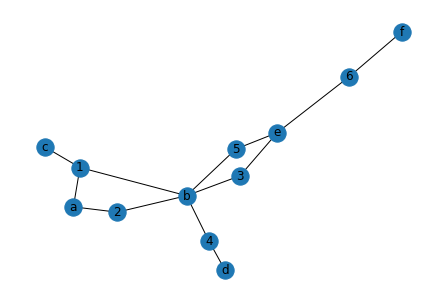

In [20]:
import matplotlib.pyplot as plt
B = nxx.Graph()
# Add nodes with the node attribute "bipartite"
B.add_nodes_from([1, 2, 3, 4,5,6], bipartite=0)
B.add_nodes_from(["a", "b", "c","d","e","f"], bipartite=1)
# Add edges only between nodes of opposite node sets
# B.add_edges_from([(1, "a"), (1, "b"), (1, "c"), (2, "a"), (2, "b"), (3, "b"), (3, "e"), (4, "b"), (4, "d"), (5, "b"), (5, "e"), (6, "e"), (6, "f")])
B.add_edge(1, "a",weight=2)
B.add_edge(1, "b",weight=1)
B.add_edge(1, "c",weight=5)
B.add_edge(2, "a",weight=4)
B.add_edge(2, "b",weight=2)
B.add_edge(3, "b",weight=3)
B.add_edge(3, "e" ,weight=2)
B.add_edge(4, "b" ,weight=4)
B.add_edge(4, "d" ,weight=6)
B.add_edge(5, "b",weight=2)
B.add_edge(5, "e",weight=4)
B.add_edge(6, "e",weight=1)
B.add_edge(6, "f",weight=1)


l, r = nxx.bipartite.sets(B)
pos = {}

# Update position for node from each group
pos.update((node, (1, index)) for index, node in enumerate(l))
# pos.update((node, (2, index)) for index, node in enumerate(r))
edge_weight_ = nxx.get_edge_attributes(B,'weight')  

nxx.draw(B,with_labels=True,)
plt.show()


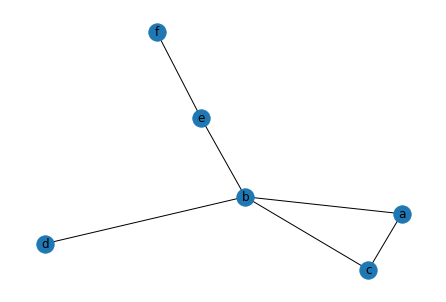

In [21]:
# Binary Projection

from networkx.algorithms import bipartite
l, r = nxx.bipartite.sets(B)
g4=bipartite.weighted_projected_graph(B,nodes=r)
# print(g4.edges(data=True))
nxx.draw(g4, with_labels=True)

[('c', 'b', {'weight': 1}), ('c', 'a', {'weight': 1}), ('b', 'd', {'weight': 1}), ('b', 'a', {'weight': 2}), ('b', 'e', {'weight': 2}), ('f', 'e', {'weight': 1})]


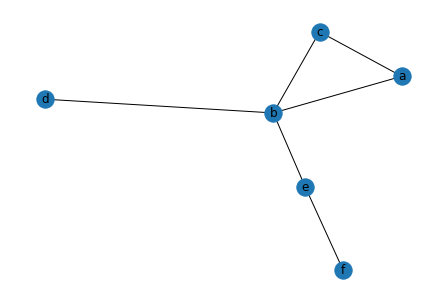

In [22]:
from networkx.algorithms import bipartite
l, r = nxx.bipartite.sets(B)
g4=bipartite.generic_weighted_projected_graph(B,nodes=r)
print(g4.edges(data=True))
nxx.draw(g4, with_labels=True,)

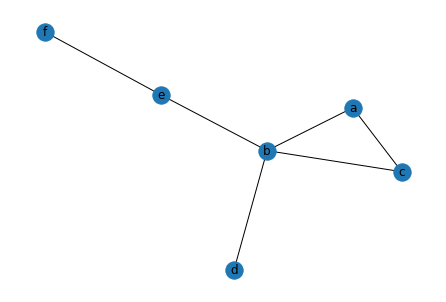

In [23]:
G = bipartite.weighted_projected_graph(B,nodes=r)
G.edges(data=True)
# nxx.draw(l, pos = pos, with_labels=True)
# nxx.draw_networkx_edge_labels(G, pos)  
nxx.draw(G, with_labels=True)

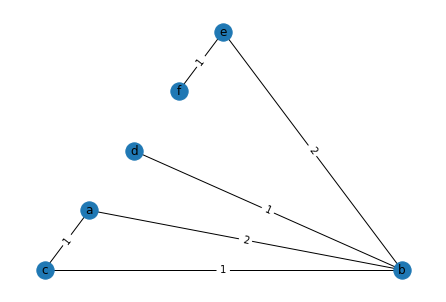

In [24]:
#Binary Sum Method Projection 


edge_weight_ = nxx.get_edge_attributes(G,'weight')
# edge_weight_
pos=nxx.planar_layout(G)
# pos=nxx.random_layout(G)
# print(pos)
nxx.draw(G,pos, with_labels=True)
nxx.draw_networkx_edge_labels(G, pos, edge_labels = edge_weight_) 
plt.show() 

In [25]:
# bipartite Clusterig 

bipartite.robins_alexander_clustering(B)

0.24242424242424243

In [26]:
# Sum method of Projection of weighted bipartite Network:

edge_weight_ = nxx.get_edge_attributes(B,'weight')  
def my_weight(G, u, v, weight='weight'):
    w1 = ()

#     print(u)
#     print(v)
#     print(G.edges)
    val=len((set(G[u]) & set(G[v])))
#     print(val)
    count=0
    for nbr in set(G[u]) & set(G[v]):
        if val==1:
            add=(nbr,u)
            add1=(nbr,v)
            w1 = ( edge_weight_[add1],edge_weight_[add])
        else:
            if count==0:
                add=(nbr,u)
                add1=(nbr,v)  
            else:
                add3=(nbr,u)
                add4=(nbr,v)
#                 print(add)
#                 print(add1)
#                 print(add3)
#                 print(add4)
#                 break
#                 print("hi")
                w1=((edge_weight_[add] + edge_weight_[add3]),(edge_weight_[add1] + edge_weight_[add4]))
#         print(count)
        count+=1    
    return w1

G = bipartite.generic_weighted_projected_graph(B, r, weight_function=my_weight)


print(  )

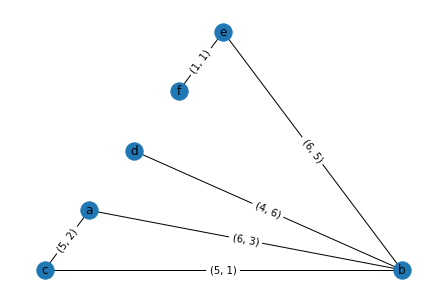

In [27]:
edge_weight_ = nxx.get_edge_attributes(G,'weight')
# edge_weight_
pos=nxx.planar_layout(G)
# pos=nxx.random_layout(G)
# print(pos)
nxx.draw(G,pos, with_labels=True)
nxx.draw_networkx_edge_labels(G, pos, edge_labels = nxx.get_edge_attributes(G,'weight')) 
plt.show() 

In [28]:
# Newman method of Projection of weighted bipartite Network:

edge_weight_ = nxx.get_edge_attributes(B,'weight')  
# edge_weight_[]
w1=0
w2=0
for i in set(B["a"]) & set(B["b"]):
#     print("\n\n")
    add=(i,"a")
    add1=(i,"b")
#     print(add)
    print()
    w1+=(edge_weight_[add]/(len(set(B[i]))-1))
    w2+=(edge_weight_[add1]/(len(set(B[i]))-1))
    
#     break
B.edges()
# w1

EdgeView([(1, 'a'), (1, 'b'), (1, 'c'), (2, 'a'), (2, 'b'), (3, 'b'), (3, 'e'), (4, 'b'), (4, 'd'), (5, 'b'), (5, 'e'), (6, 'e'), (6, 'f')])

In [29]:
# Weighted Newman Method:

edge_weight_ = nxx.get_edge_attributes(B,'weight')  
def my_weight(G, u, v, weight='weight'):
    w1 = ()

#     print(u)
#     print(v)
#     print(G.edges)
    val=len((set(G[u]) & set(G[v])))
#     print(val)
    count=0
    for nbr in set(G[u]) & set(G[v]):
        if val==1:
            add=(nbr,u)
            add1=(nbr,v)
            w1 = (edge_weight_[add1]/(len(set(G[nbr]))-1),edge_weight_[add]/(len(set(G[nbr]))-1))
        else:
            if count==0:
                add=(nbr,u)
                add=edge_weight_[add]/(len(set(B[nbr]))-1)
                add1=(nbr,v)  
                add1=edge_weight_[add1]/(len(set(B[nbr]))-1)
                
            else:
                add3=(nbr,u)
                add4=(nbr,v)
#                 print(add)
#                 print(add1)
#                 print(add3)
#                 print(add4)
#                 break
#                 print("hi")
                w1=((add+ (edge_weight_[add3]/(len(set(G[nbr]))-1))),(add1 + (edge_weight_[add4]/(len(set(G[nbr]))-1))))
#         print(count)
        count+=1    
    return w1

G = bipartite.generic_weighted_projected_graph(B, r, weight_function=my_weight)


# print(G.edges(data=True))

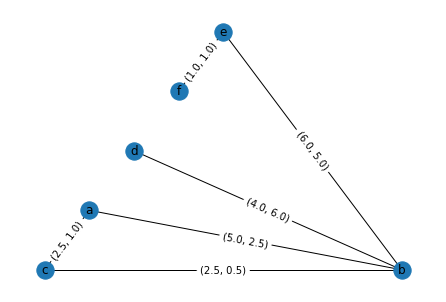

In [30]:
edge_weight_ = nxx.get_edge_attributes(G,'weight')
# edge_weight_
pos=nxx.planar_layout(G)
# pos=nxx.random_layout(G)
# print(pos)
nxx.draw(G,pos, with_labels=True)
nxx.draw_networkx_edge_labels(G, pos, edge_labels = nxx.get_edge_attributes(G,'weight')) 
plt.show() 

#  Lab 6 is directed graph so clustering is performed in R language

In [31]:
import pandas as pd
file=pd.read_csv(r"C:\Users\Hp\Downloads\911-weighted.csv")
file.head()

,node,node.1,weight
0,1,3,2
1,1,5,1
2,1,7,1
3,1,8,1
4,1,9,1


In [32]:
# file.iloc[0:1,:3]
file.shape
G6 = nxx.DiGraph()

for i in range(0,(file.shape[0]+1)):
#     print(i)
    if i==0:
        G6.add_edge(1, 3,weight=2)
#         print(k)
    else:
        k=file.iloc[i-1:i,:3]
        k=k.values.tolist()
#     print(k)
        node1=k[0][0]
#     print(node1)
        node2=k[0][1]
#     print(node2)
        weight1=k[0][2]
#     print(weight1)
#     break
        G6.add_edge(node1, node2,weight=weight1)


    

In [33]:
G6.degree()

DiDegreeView({1: 22, 3: 13, 5: 6, 7: 8, 8: 8, 9: 9, 10: 1, 15: 4, 23: 4, 26: 7, 27: 5, 30: 4, 34: 1, 38: 5, 43: 11, 47: 4, 56: 4, 62: 10, 2: 4, 16: 2, 4: 8, 11: 4, 28: 3, 35: 5, 39: 2, 41: 2, 42: 8, 49: 4, 50: 4, 12: 5, 32: 6, 13: 2, 14: 6, 17: 1, 18: 4, 20: 11, 21: 6, 29: 8, 6: 3, 19: 1, 24: 3, 22: 7, 25: 10, 33: 5, 55: 2, 31: 18, 36: 3, 40: 2, 37: 1, 48: 1, 57: 1, 44: 2, 45: 1, 46: 3, 51: 2, 52: 1, 53: 3, 54: 4, 59: 1, 60: 2, 61: 6, 58: 3})

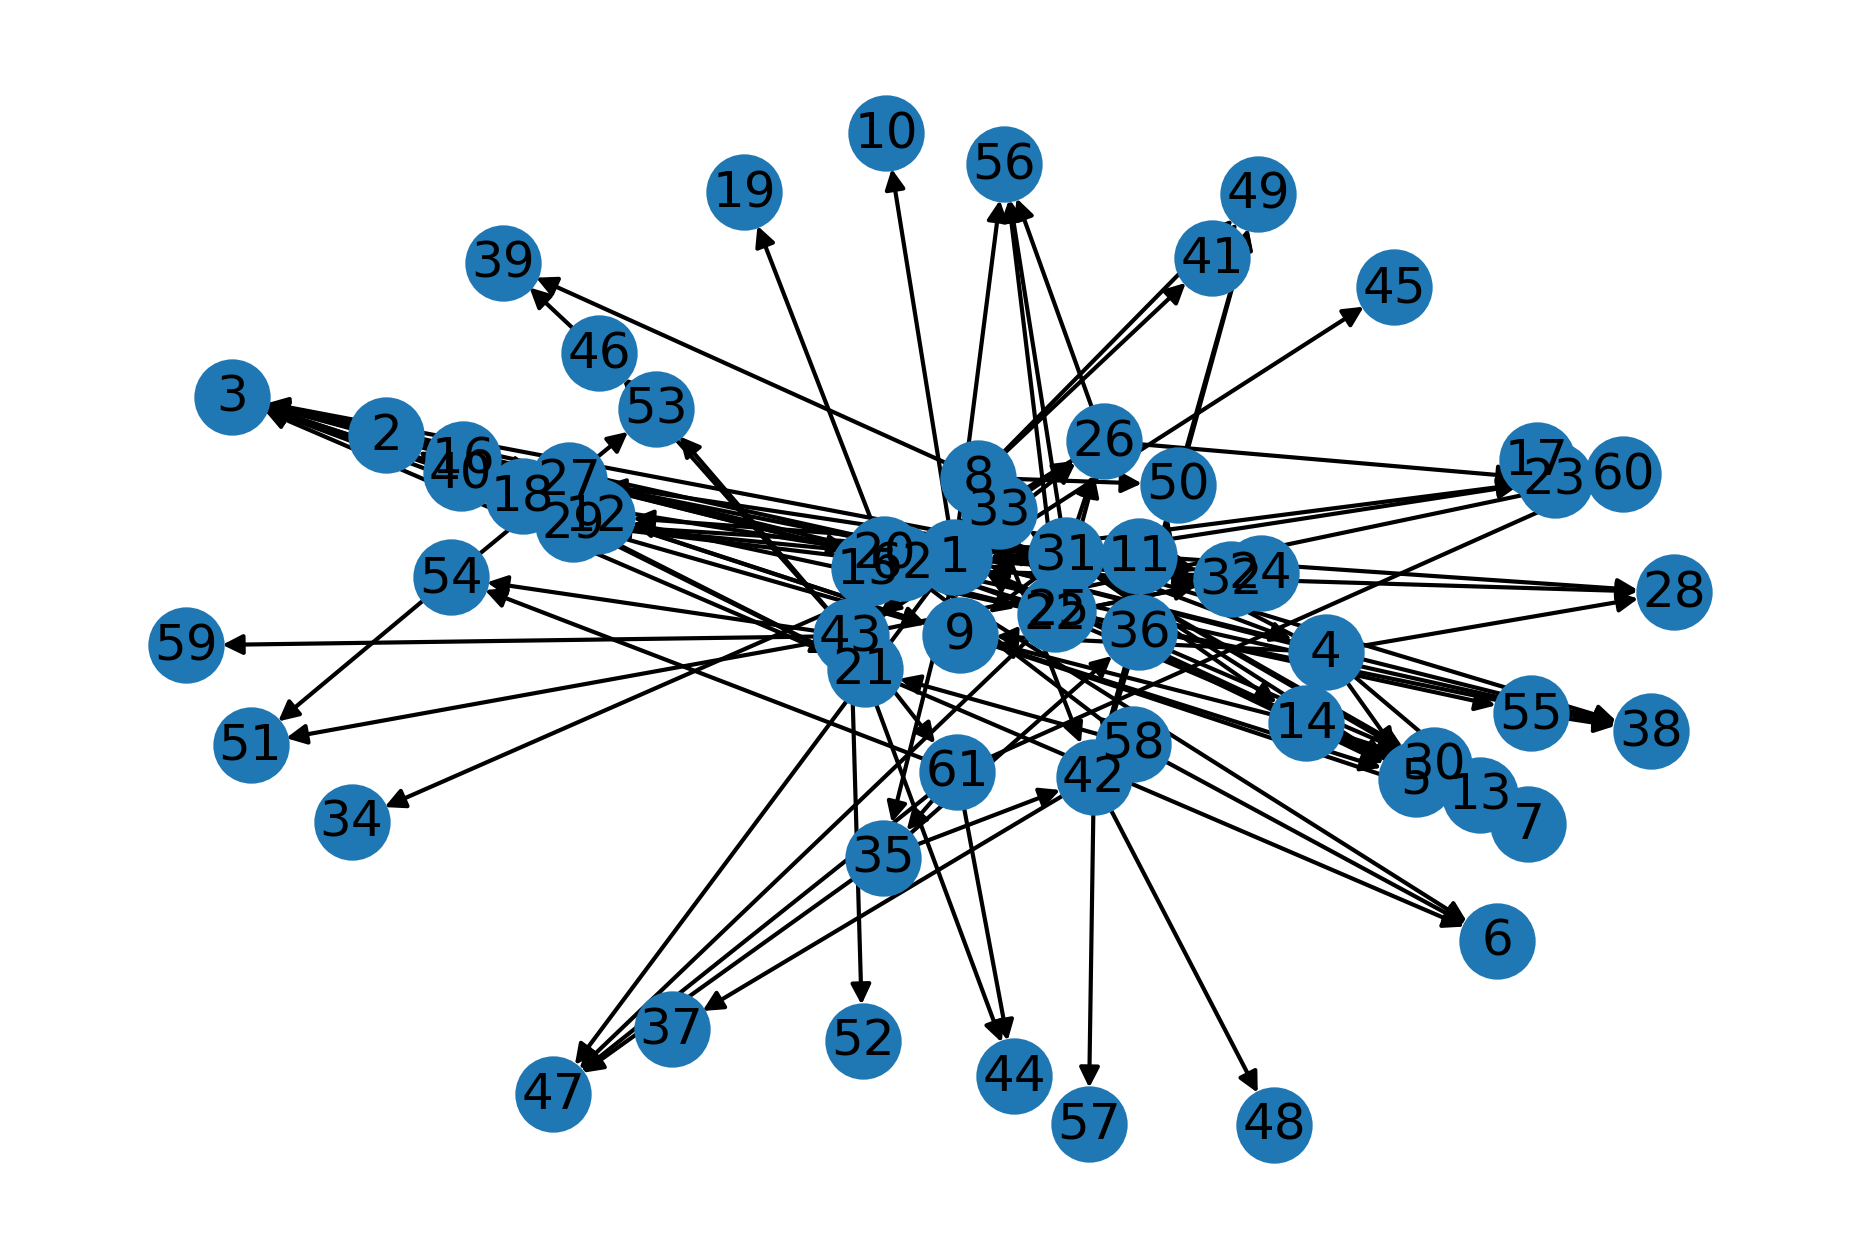

In [34]:
# edge_weight_ = nxx.get_edge_attributes(G,'weight')
# edge_weight_
plt.figure(dpi=300)
# pos=nxx.planar_layout(G6)
# pos=nxx.random_layout(G6)
# print(pos)
nxx.draw(G6,with_labels=True)
# nxx.draw_networkx_edge_labels(G6, pos) 
plt.show() 

In [35]:
# Density of Network

len(G6.nodes())*(len(G6.nodes())-1)/len(G6.edges())

24.718954248366014

In [36]:
# Strength of undirected graph
data=[]
out=0
for node in G6.nodes():
    for edges in G6.edges(node):
#         print(*edges)
#         break
        out+=G6.get_edge_data(*edges)["weight"]
    print("Strength of Node "+str(node)+" is:: "+str(out))
    data.append(out)
#     break
    out=0
    
data

Strength of Node 1 is:: 25
Strength of Node 3 is:: 0
Strength of Node 5 is:: 1
Strength of Node 7 is:: 0
Strength of Node 8 is:: 6
Strength of Node 9 is:: 3
Strength of Node 10 is:: 0
Strength of Node 15 is:: 3
Strength of Node 23 is:: 0
Strength of Node 26 is:: 5
Strength of Node 27 is:: 4
Strength of Node 30 is:: 1
Strength of Node 34 is:: 0
Strength of Node 38 is:: 0
Strength of Node 43 is:: 10
Strength of Node 47 is:: 0
Strength of Node 56 is:: 0
Strength of Node 62 is:: 3
Strength of Node 2 is:: 6
Strength of Node 16 is:: 1
Strength of Node 4 is:: 10
Strength of Node 11 is:: 6
Strength of Node 28 is:: 0
Strength of Node 35 is:: 3
Strength of Node 39 is:: 0
Strength of Node 41 is:: 1
Strength of Node 42 is:: 4
Strength of Node 49 is:: 0
Strength of Node 50 is:: 2
Strength of Node 12 is:: 2
Strength of Node 32 is:: 5
Strength of Node 13 is:: 2
Strength of Node 14 is:: 9
Strength of Node 17 is:: 2
Strength of Node 18 is:: 6
Strength of Node 20 is:: 20
Strength of Node 21 is:: 6
Stren

[25,
 0,
 1,
 0,
 6,
 3,
 0,
 3,
 0,
 5,
 4,
 1,
 0,
 0,
 10,
 0,
 0,
 3,
 6,
 1,
 10,
 6,
 0,
 3,
 0,
 1,
 4,
 0,
 2,
 2,
 5,
 2,
 9,
 2,
 6,
 20,
 6,
 5,
 0,
 0,
 3,
 14,
 17,
 9,
 1,
 30,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 2,
 0,
 0,
 5,
 3]

In [37]:
atr=pd.read_csv(r"C:\Users\Hp\Downloads/node-attribs.csv")
atr=atr["NODE_NAME"].tolist()

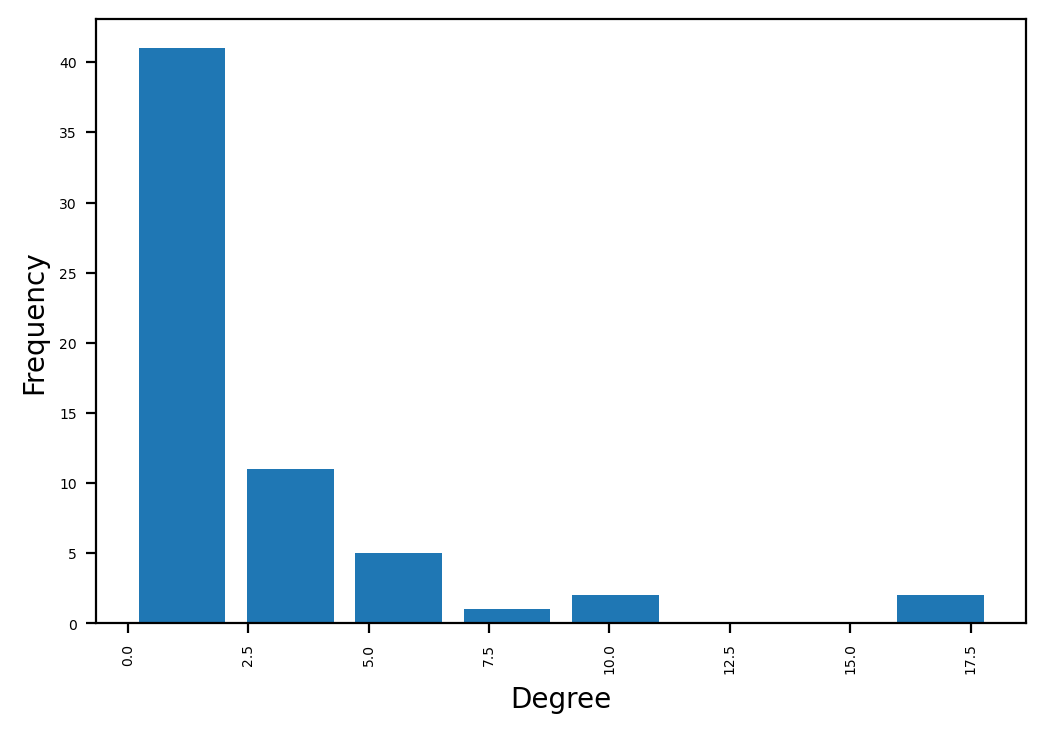

In [100]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(dpi=200)
list1=[]
for i in G6.out_degree:
    list1.append(i[1])
#     break
import seaborn as sns
plt.hist(list1,bins=8,rwidth=0.8)
plt.xlabel("Degree")
plt.ylabel("Frequency")
y=plt.xticks(rotation=90)
# plt.xticks(range(0,20,5))
# plt.yticks(range(0,50,10))

plt.tick_params(labelsize=5)
# list1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


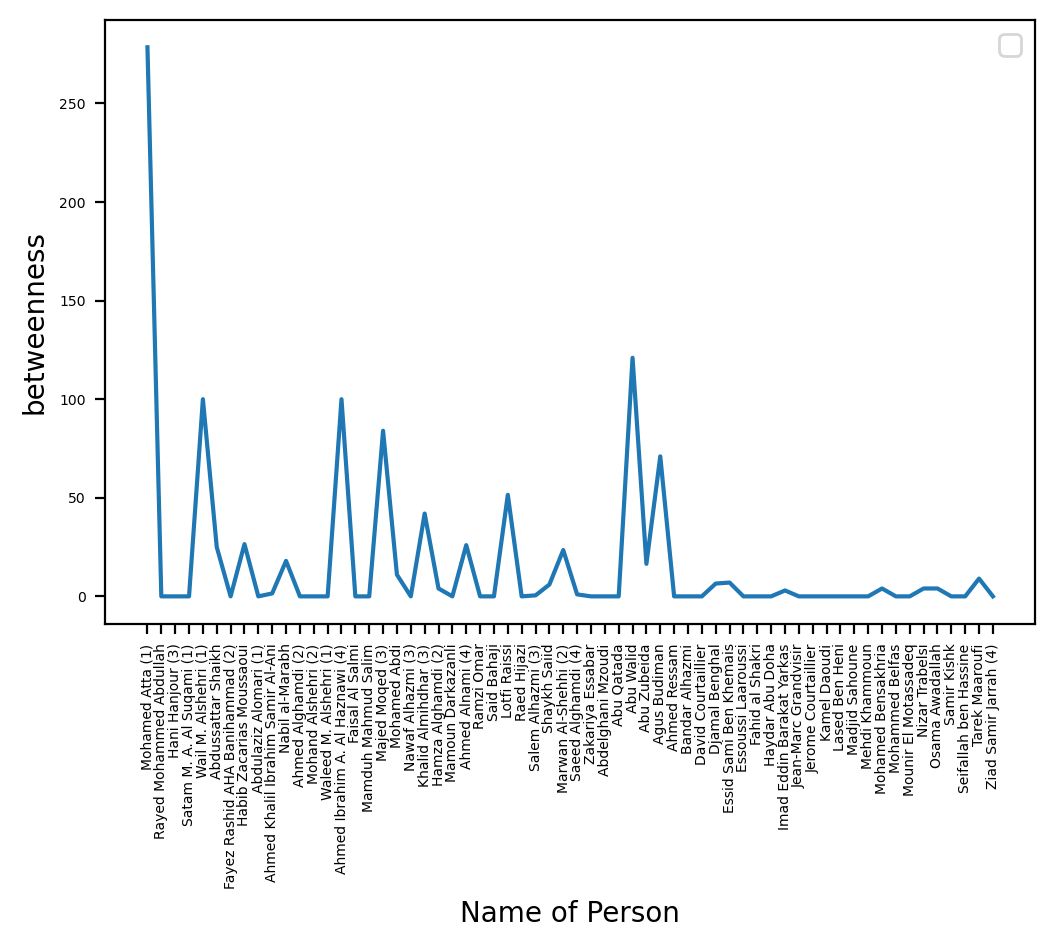

In [39]:
# betweenness_centrality of Network
plt.figure(dpi=200)
bet_centrality = nxx.betweenness_centrality(G6,normalized=False)
list1=[i for i in bet_centrality.values() ]
list2=[str(i) for i in bet_centrality.keys() ]
plt.plot(atr,list1)
y=plt.xticks(rotation=90)
plt.xlabel("Name of Person")
plt.ylabel("betweenness")
plt.legend()
plt.tick_params(labelsize=5)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


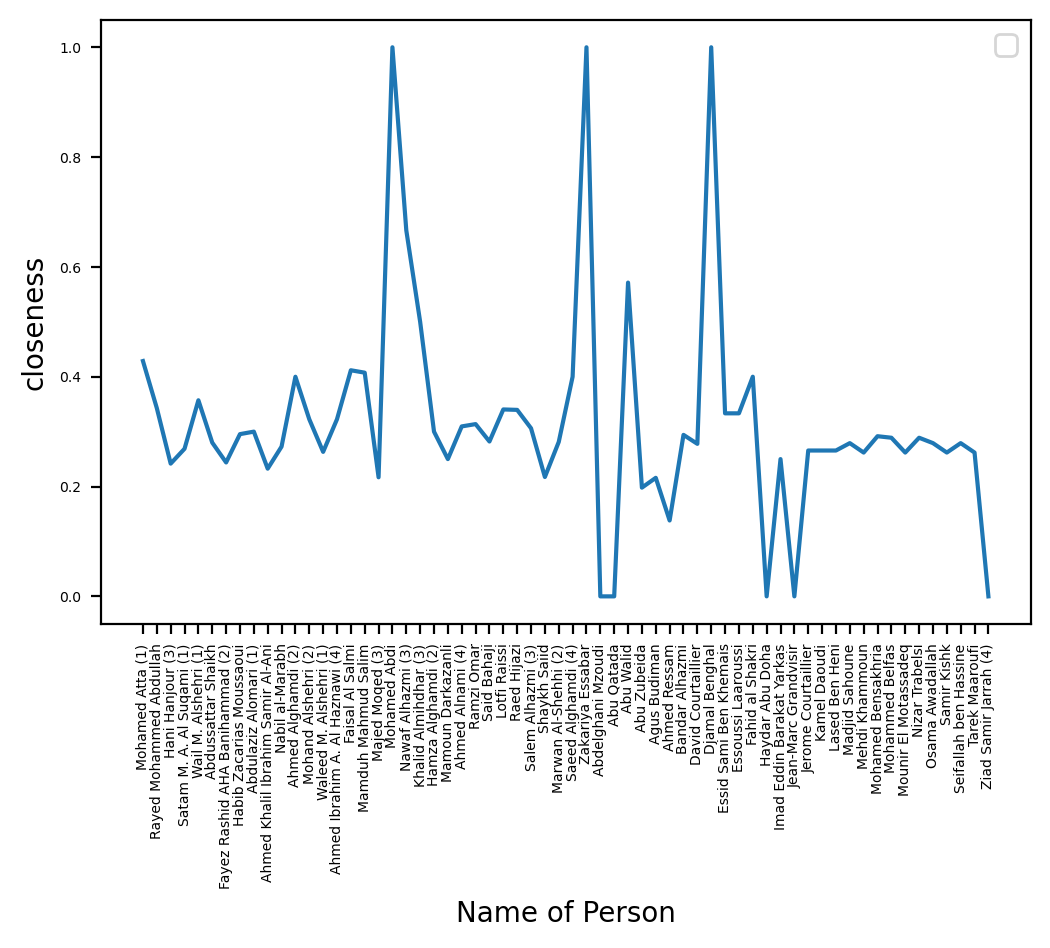

In [40]:
plt.figure(dpi=200)
edge_weight_ = nxx.get_edge_attributes(G6,'weight')  
bet_centrality = nxx.closeness_centrality(G6, distance='weight',wf_improved=False)
list1=[i for i in bet_centrality.values() ]
plt.plot(atr,list1)
y=plt.xticks(rotation=90)
plt.xlabel("Name of Person")
plt.ylabel("closeness")
plt.legend()
plt.tick_params(labelsize=5)

In [41]:
len(G6.nodes())
list1=[]
for i in G6.nodes():
    list1.append(i)
# list1

In [42]:
from itertools import combinations
com=list(combinations(list1,3))

In [43]:
com_alter=[]
for i in com:
    com_alter.append((i[0],i[1],i[2]))    
    com_alter.append((i[1],i[2],i[0]))
    com_alter.append((i[2],i[0],i[1]))
#     print(i)
# com_alter

In [44]:
new_edge={}
for k in edge_weight_:
    new_edge[k]=edge_weight_[k]
    new_edge[(k[1],k[0])]=edge_weight_[k]
#     break
#     print(edge_weight_[k])
#     print(v)

new_edge

{(1, 3): 2,
 (3, 1): 2,
 (1, 5): 1,
 (5, 1): 1,
 (1, 7): 1,
 (7, 1): 1,
 (1, 8): 1,
 (8, 1): 1,
 (1, 9): 1,
 (9, 1): 1,
 (1, 10): 2,
 (10, 1): 2,
 (1, 15): 1,
 (15, 1): 1,
 (1, 23): 2,
 (23, 1): 2,
 (1, 26): 3,
 (26, 1): 3,
 (1, 27): 2,
 (27, 1): 2,
 (1, 30): 1,
 (30, 1): 1,
 (1, 34): 1,
 (34, 1): 1,
 (1, 38): 1,
 (38, 1): 1,
 (1, 43): 1,
 (43, 1): 1,
 (1, 47): 1,
 (47, 1): 1,
 (1, 56): 1,
 (56, 1): 1,
 (1, 62): 3,
 (62, 1): 3,
 (5, 7): 1,
 (7, 5): 1,
 (8, 35): 1,
 (35, 8): 1,
 (8, 39): 1,
 (39, 8): 1,
 (8, 41): 1,
 (41, 8): 1,
 (8, 42): 1,
 (42, 8): 1,
 (8, 49): 1,
 (49, 8): 1,
 (8, 50): 1,
 (50, 8): 1,
 (9, 3): 1,
 (3, 9): 1,
 (9, 5): 1,
 (5, 9): 1,
 (9, 7): 1,
 (7, 9): 1,
 (15, 62): 3,
 (62, 15): 3,
 (26, 23): 1,
 (23, 26): 1,
 (26, 56): 1,
 (56, 26): 1,
 (26, 62): 3,
 (62, 26): 3,
 (27, 3): 2,
 (3, 27): 2,
 (27, 62): 2,
 (62, 27): 2,
 (30, 7): 1,
 (7, 30): 1,
 (43, 44): 1,
 (44, 43): 1,
 (43, 45): 1,
 (45, 43): 1,
 (43, 46): 1,
 (46, 43): 1,
 (43, 51): 1,
 (51, 43): 1,
 (43, 52): 1

In [45]:
AM={}
GM={}
MIN={}
MAX={}
import math
for i in com_alter:
    first_edge=i[0:2]
    second_edge=i[1:3]
#     print(first_edge)
    if first_edge in new_edge.keys() and second_edge in new_edge.keys():
#         print(i)
#         print("Wij= ",new_edge[first_edge],"Wjk "+str(new_edge[second_edge]))
#         print("AM :",(new_edge[first_edge]+new_edge[second_edge])/2)
#         print("GM :",math.sqrt((new_edge[first_edge]*new_edge[second_edge])))
#         print("min :",min(new_edge[first_edge],new_edge[second_edge]))
#         print("max :",max(new_edge[first_edge],new_edge[second_edge]))
        
        GM[i]=math.sqrt((new_edge[first_edge]*new_edge[second_edge]))
        AM[i]=(new_edge[first_edge]+new_edge[second_edge])/2
        MIN[i]=min(new_edge[first_edge],new_edge[second_edge])
        MAX[i]=max(new_edge[first_edge],new_edge[second_edge])
        
        
        
        print("\n\n")

In [46]:
tup=""
# tri=nxx.triangles(G6)
# # print(sum(tri.values()))
# for i in tri:
#     if tri[i]==1:
#         tup=tup+str((i))
# tup=tuple(tup)
# tup=tuple(int(item) for item in tup)
# tup
# make triange of it
# triangle=[tup,(tup[1],tup[2],tup[0]),(tup[2],tup[0],tup[1])]
# triangle

all_cliques= nxx.enumerate_all_cliques(G6)

triad_cliques=[x for x in all_cliques if len(x)==3 ]

sum_tri_AM=0
sum_tri_GM=0
min_tri=0
max_tri=0
for i in triad_cliques:
    j=tuple(i)
    sum_tri_AM+=int(AM[j])
    sum_tri_GM+=int(GM[j])
    min_tri+=int(MIN[j])
    max_tri+=int(MAX[j])
    count+=1

print(sum_tri_AM)
# t=(7,5,1)
# print(t)
print(len(MAX))

NetworkXNotImplemented: not implemented for directed type

In [ ]:
AM_cal=sum_tri_AM/sum(AM.values())
print(AM_cal)
GM_cal=sum_tri_GM/sum(GM.values())
print(GM_cal)
min_cal=min_tri/sum(MIN.values())
print(min_cal)
max_cal=max_tri/sum(MAX.values())
print(max_cal)